In [1]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

In [2]:
lena = misc.imread('images/LENA_512.jpg')
ship = misc.imread('images/statek_640_505.jpg')

In [3]:
def greyscale(picture):
    grey_picture = np.copy(picture)
    for row in grey_picture:
        for col in row:
            col[0] = col[1] = col[2] = (int(col[0]) + int(col[1]) + int(col[2]))/3
    return grey_picture

In [4]:
def histogramrgb (picture):
    r = [0 for _ in xrange(256)]
    g = [0 for _ in xrange(256)]
    b = [0 for _ in xrange(256)]
    for x in picture:
        for y in x:
            r[y[0]] += 1
            g[y[1]] += 1
            b[y[2]] += 1
    plt.plot(range(256), r, 'r-')
    plt.plot(range(256), g, 'g-')
    plt.plot(range(256), b, 'b-')
    plt.axis([0, 255, 0, max(max(r),max(g),max(b))])
    plt.show()

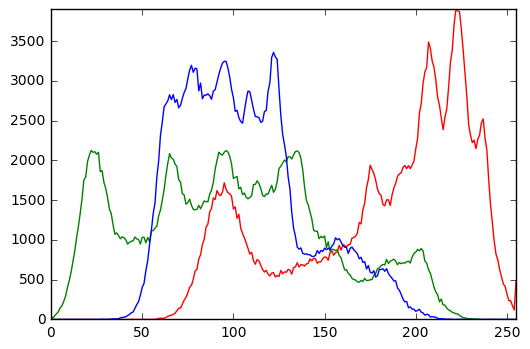

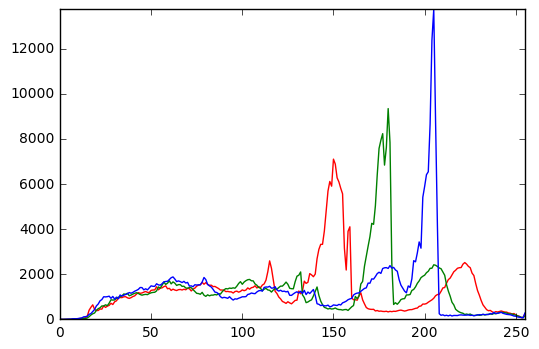

In [5]:
histogramrgb(lena)
histogramrgb(ship)

In [6]:
def histogramk (picture):
    k = [0 for _ in xrange(256)]
    for x in picture:
        for y in x:
            k[(int(y[0])+int(y[1])+int(y[2]))/3] += 1
    plt.plot(range(256), k, 'k-')
    plt.axis([0, 255, 0, max(k)])
    plt.show()

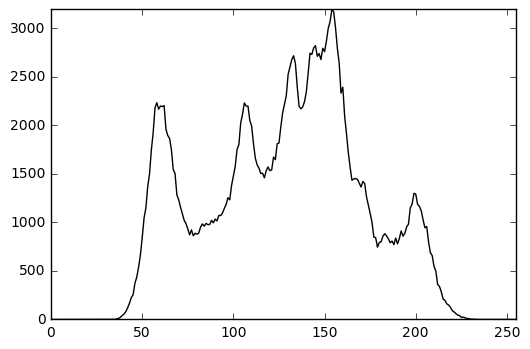

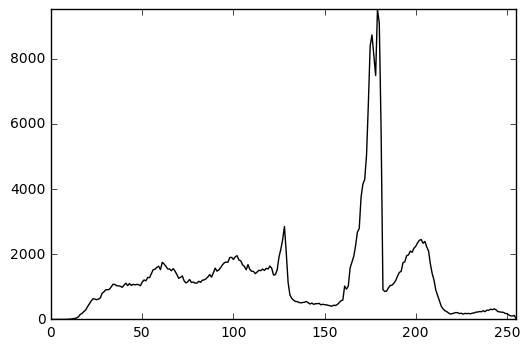

In [7]:
histogramk(lena)
histogramk(ship)

In [8]:
def contrast (picture, a):
    LUT = [0 for _ in xrange(256)]
    for x in picture:
        for y in x:
            if ((a*(i-255/2)+255/2) < 0):
                LUT[i] = 0
            if ((a*(i-255/2)+255/2) < 255):
                LUT[i] = a*(i-255/2) + i
            if ((a*(i-255/2)+255/2) > 255): 
                LUT[i] = 255
                

In [9]:
def RGBtoYCbCr(picture):
    YCbCrpicture = np.copy(picture)
    for x, row in enumerate(YCbCrpicture):
        for y, col in enumerate(row):
            YCbCrpicture[x][y][0] = 0.299 * picture[x][y][0] + 0.587 * picture[x][y][1] + 0.114 * picture[x][y][2]
            YCbCrpicture[x][y][1] = 128 - 0.168736 * picture[x][y][0] - 0.331264 * picture[x][y][1] + 0.5 * picture[x][y][2]
            YCbCrpicture[x][y][2] = 128 + 0.5 * picture[x][y][0] - 0.418688 * picture[x][y][1] - 0.081312 * picture[x][y][2]
    return YCbCrpicture

In [10]:
def YCbCrtoRGB(picture):
    RGBpicture = np.copy(picture)
    for x, row in enumerate(RGBpicture):
        for y, col in enumerate(row):
            RGBpicture[x][y][0] = picture[x][y][0] + 1.402 * (picture[x][y][2] - 128) 
            RGBpicture[x][y][1] = picture[x][y][0] - 0.34414 * (picture[x][y][1] - 128) - 0.71414 * (picture[x][y][2] - 128)
            RGBpicture[x][y][2] = picture[x][y][0] + 1.772   * (picture[x][y][1] - 128)
    return RGBpicture

In [33]:
def streching (picture):
    stretchpic = np.copy(picture)
    RGBtoYCbCr(stretchpic)
    LUT = [0 for _ in xrange(256)]
    vmax = 0
    vmin = 255
    for x, row in enumerate(stretchpic):
        for y, col in enumerate(row):
            if (stretchpic[x][y][0] > vmax):
                vmax = stretchpic[x][y][0]
            if (stretchpic[x][y][0] < vmin):
                vmin = stretchpic[x][y][0]
    for i, _ in enumerate(LUT):
        LUT[i] = (255/(vmax-vmin))*(i-vmin)
    for x, row in enumerate(stretchpic):
        for y, col in enumerate(row):
            i, _, _ = stretchpic[x, y]
            stretchpic[x, y] = (LUT[i], stretchpic[x][y][1], stretchpic[x][y][2])
    return YCbCrtoRGB(stretchpic)
            

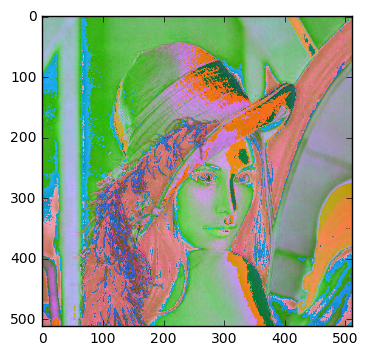

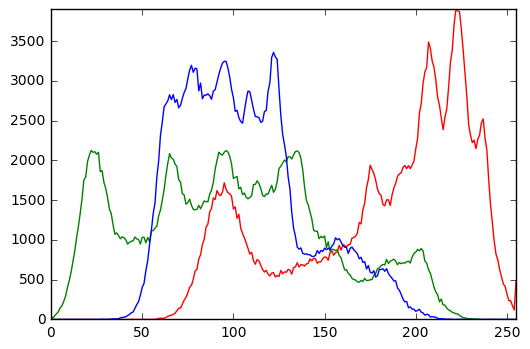

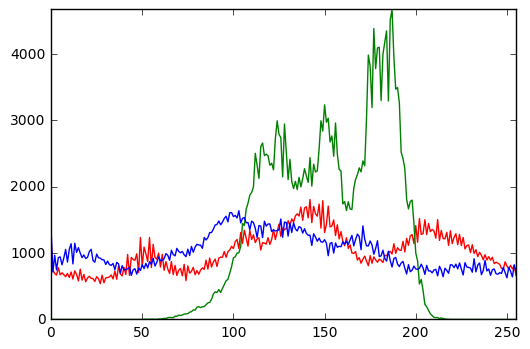

In [34]:
lenas = streching (lena)
plt.imshow(lenas)
plt.show()
histogramrgb (lena)
histogramrgb(streching (lena))